In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import  metrics

import matplotlib.pyplot as plt

# let's read the dataset first

data = pd.read_csv("winequality-white.csv",sep=';')
print(data.shape)
print(data.head())

(4898, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.

In [3]:
# convert frame to numpy-array representation and separate the data from the target :


X=data.as_matrix(data.columns[:-1])
Y=data.as_matrix([data.columns[-1]])

#flatten Y : Return a copy of the array collapsed into one dimension 
Y=Y.flatten()
print("data shape {} , target shape {} ".format(X.shape,Y.shape))

data shape (4898, 11) , target shape (4898,) 


In [4]:
#make it a binary classifier
y_class = np.where(Y<6 , 0,1)

#lets count how many + and - we have .. using the zip function
#zip :  returns a list of tuples, where the i-th tuple contains the i-th element 
#zip :  from each of the argument sequences or iterables
unique,counts=np.unique(y_class,return_counts=True)
counter = zip(unique,counts)
for i in counter :
    print(i)


(0, 1640)
(1, 3258)


[Text(0.5,1,'alcohol')]

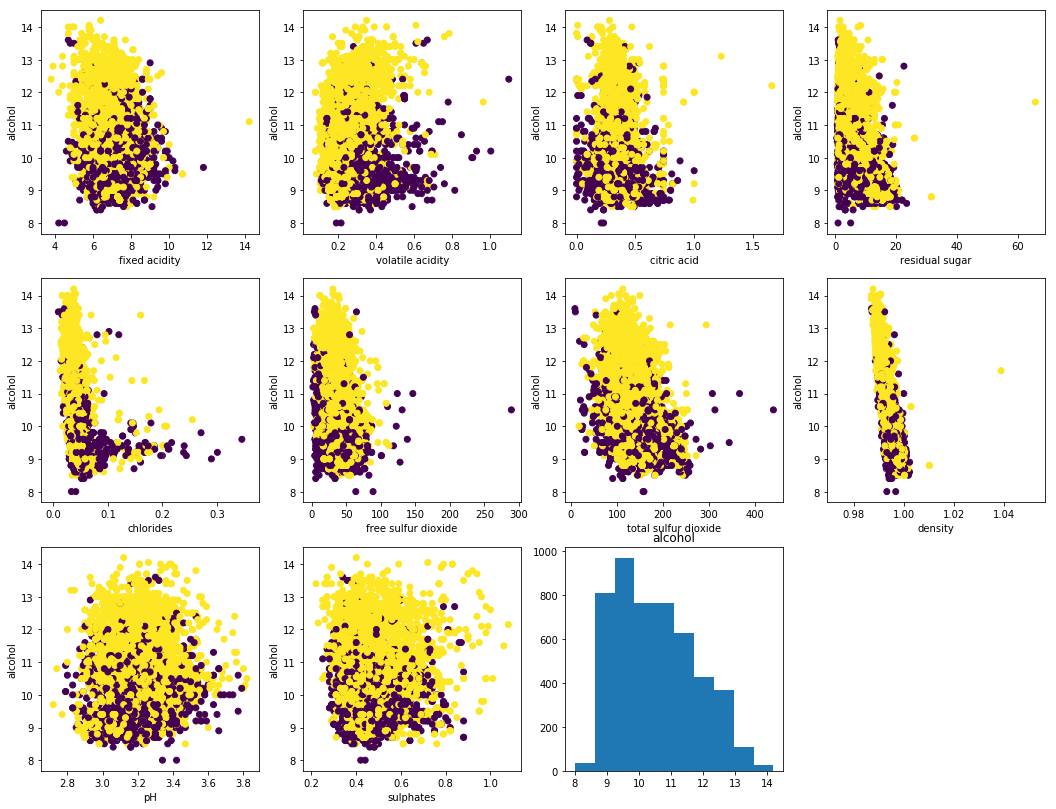

In [5]:
#visualisation : alcohol vs others ;;  y_class ?

fig = plt.figure(figsize=(18,14))

alcohol_index = 10 
for feature_index in range(X.shape[1]-1):
    
    ax = fig.add_subplot(3,4,feature_index + 1)
    h = ax.scatter(X[:,feature_index],X[:,alcohol_index],c=y_class)
    ax.set(xlabel=data.columns[feature_index],ylabel="alcohol")
    
ax = fig.add_subplot(3,4,feature_index + 2)
h = ax.hist(X[:,alcohol_index])
ax.set(title="alcohol")

In [6]:
def gridsearch_alternative(liste_param,n_folds):
    
    """"cette fonction retourne une liste qui contient les scores sur chaque parametre """
    
    
    n_modeles = len(liste_param) #nombre de modele qu'on va tester
    pas = int(X.shape[0]/n_folds) #taille du chaque fold (also du jeu de test )
    score = [] # la liste qui contient les performance de chaque modele ET la liste a retourner
    for param in liste_param :
        #le parametre est fixe
        splits_score = []
        for split in range(n_folds) :
            
            #split des indices :
            #j'ai travailler avec la methode KFold .. j'ai implementer le train/test split
            
            X_test,y_test = X[pas*split:pas*(split+1)],y_class[pas*split:pas*(split+1)]
            
            if split==0 :
                X_train,y_train = X[pas*(split+1):],y_class[pas*(split+1):]
            elif split == n_folds - 1 :
                X_train,y_train = X[:pas*split],y_class[:pas*split]
            else :
                X_train,y_train = np.concatenate([X[:pas*split],X[pas*(split+1):]]),np.concatenate([y_class[:pas*split],y_class[pas*(split+1):]])
                
            #standardiser les donnees avant d' entrainer le modele   
            stand_scal = StandardScaler().fit(X_train)
            X_train_scaled = stand_scal.transform(X_train)
            X_test_scaled = stand_scal.transform(X_test)
            
            #entrainer le modele
            
            knn = KNeighborsClassifier(param)
            knn.fit(X_train_scaled,y_train)
            y_pred = knn.predict(X_test_scaled)
            
            splits_score+=[metrics.accuracy_score(y_test,y_pred)]
            
            
        score+=[np.mean(splits_score)]
        
    return score
                
        

In [11]:
liste_param=[5,6,7,8,9,10,11]
score=gridsearch_alternative(liste_param,5)
for i in range(len(liste_param)):
    print("parame {} >>>> score {}".format(liste_param[i],score[i]))

parame 5 >>>> score 0.7213483146067416
parame 6 >>>> score 0.7199182839632278
parame 7 >>>> score 0.7195097037793667
parame 8 >>>> score 0.7297242083758937
parame 9 >>>> score 0.7315628192032687
parame 10 >>>> score 0.7291113381001022
parame 11 >>>> score 0.7348314606741574
